<a href="https://colab.research.google.com/github/IrinaFab/HMEQ/blob/main/HMEQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Home Equity Loan Dataset


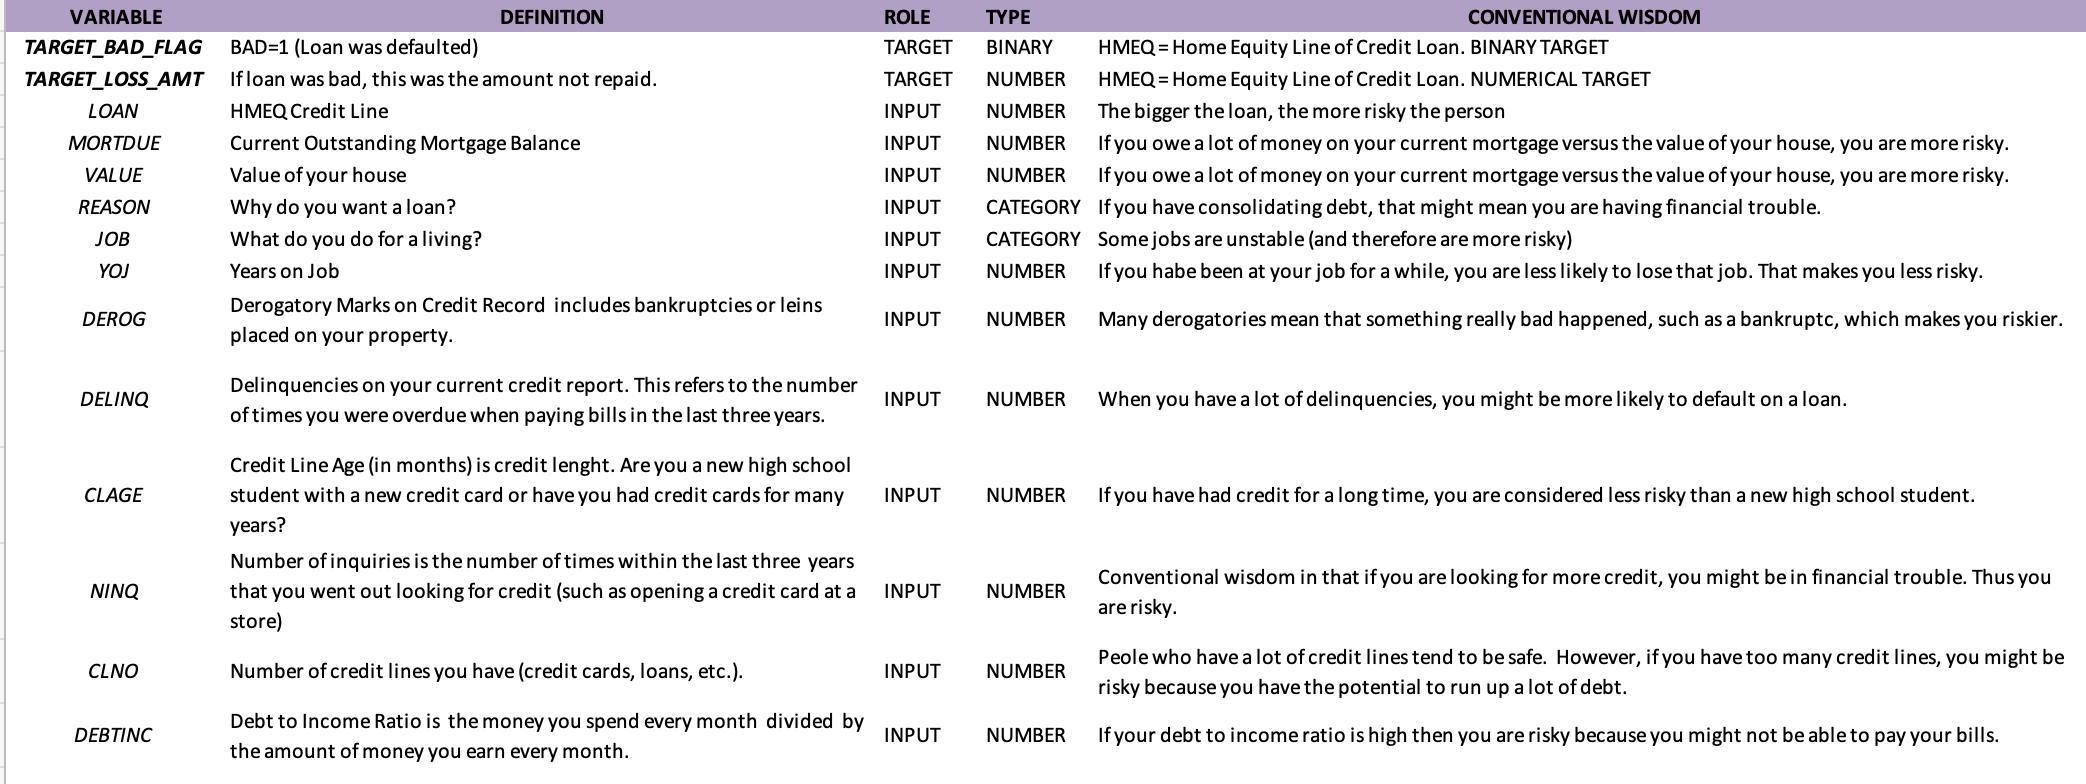



Problem statement: Will the applicant who is requesting a home equity loans pay the loan or not?

Examine Home Equity Loans (HMEQ) dataset, which includes characteristics and delinquency information for 5,960 home equity loans, in order to develop predictive models that will be used to determine the level of risk for each loan.

The dataset contains two target variables:

1.TARGET_BAD_FLAG indicates whether or not the loan applicant defaulted or was a delinquent. If the value is set to 1, then the loan went bad and the bank lost money. If the value is set to 0, the loan was repaid.

2.TARGET_LOSS_AMT indicates the amount of money that was lost for loans that went bad. 

The remaining 12 variables contain information about the customer at the time that the loan was issued.

As with all real world data, this dataset is far from perfect and contains:
* both numerical and categorical variables.
* missing data.
* outliers.


In [146]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import math

from operator import itemgetter  

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn import tree
from sklearn.tree import _tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor   
from sklearn.ensemble import GradientBoostingClassifier  

In [147]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<iframe src="https://drive.google.com/file/d/1FyvKkzBGuz4WFbPtcVbLkVYYSl2XdEnj/preview" width="640" height="480" allow="autoplay"></iframe>

### Loading the HMEQ dataset

In [148]:
df = pd.read_csv('/content/gdrive/MyDrive/HMEQ_Loss.csv')

### Visualizing records

In [149]:
df.head()
# df.head().T # print the dataframe transposed for a better visualization 

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1109.0,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,767.0,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1425.0,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [150]:
df.tail()

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,NaN,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,NaN,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,NaN,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,NaN,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,NaN,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [151]:
# display 20 columns, transposed
pd.set_option('display.max_columns', 20)
df

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1109.0,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,767.0,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1425.0,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,NaN,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,NaN,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,NaN,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,NaN,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [152]:
# change the target variables for easy coding
# TARGET_F - whether or not the loan defaulted; the value 1 = loan went bad; the value 0 = loan repaid
# TARGET_A - bank loss amlount due to loans not repaid
TARGET_F = 'TARGET_BAD_FLAG'
TARGET_A = 'TARGET_LOSS_AMT'

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET_BAD_FLAG  5960 non-null   int64  
 1   TARGET_LOSS_AMT  1189 non-null   float64
 2   LOAN             5960 non-null   int64  
 3   MORTDUE          5442 non-null   float64
 4   VALUE            5848 non-null   float64
 5   REASON           5708 non-null   object 
 6   JOB              5681 non-null   object 
 7   YOJ              5445 non-null   float64
 8   DEROG            5252 non-null   float64
 9   DELINQ           5380 non-null   float64
 10  CLAGE            5652 non-null   float64
 11  NINQ             5450 non-null   float64
 12  CLNO             5738 non-null   float64
 13  DEBTINC          4693 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 652.0+ KB


In [154]:
# display the data types and store into a variable, dt
dt = df.dtypes
dt

TARGET_BAD_FLAG      int64
TARGET_LOSS_AMT    float64
LOAN                 int64
MORTDUE            float64
VALUE              float64
REASON              object
JOB                 object
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
dtype: object

In [155]:
df.isna().sum()

TARGET_BAD_FLAG       0
TARGET_LOSS_AMT    4771
LOAN                  0
MORTDUE             518
VALUE               112
REASON              252
JOB                 279
YOJ                 515
DEROG               708
DELINQ              580
CLAGE               308
NINQ                510
CLNO                222
DEBTINC            1267
dtype: int64

In [156]:
# use "describe" to do a brief statistical summary of the data and store into a variable x
x = df.describe().T
x

,count,mean,std,min,25%,50%,75%,max
TARGET_BAD_FLAG,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
TARGET_LOSS_AMT,1189.0,13414.576955,10839.455965,224.000000,5639.000000,11003.000000,17634.000000,78987.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000


### Interpretation
* 5,960 apllicants who defauled the loan or did not default the loan
* On average, almost 20% of people did not pay their loans as TARGET_BAD_FLAG = 1 when the loan was bad.
* The amount not repaid occured in 1,189 instances, with an average of 13,414 dollars, ranging from 224 to 78,987 dollars.
* The average amount of loan was 18,607 dollars, minimum loan amount is 1100 while maximum loan amount is 89,900 dollars.
* The current outstanding mortgage balance, on average, was 73,760 dollars.
* The house value, on average, was 101,776 dollars with a maximum value of 855,909 dollars.
* Years on job range was between 0 and 41 years.
* Derogatory marks (e.g.,bankrupcies) occured in 25% of instances.
* Delinquencies (e.g., bill overdue) in the last three years occured in almost 50% of instances.
* Credit line age range was 0 months credit period to 1168 months credit period.
* Number of inquiries in the last three years was from 0 to 17 instances.
* Number of credit lines a person made was from 0 to 71 credit lines.
* Debt to income ratio had an average of almost 34%.

In [157]:
# display individual values (ex, Credit line age) using .loc
x.loc['CLAGE']

count    5652.000000
mean      179.766275
std        85.810092
min         0.000000
25%       115.116702
50%       173.466667
75%       231.562278
max      1168.233561
Name: CLAGE, dtype: float64

In [158]:
# display the average value of a credit line age
x.loc['CLAGE', 'mean']

179.7662751900468

In [159]:
# finding variables that are objects (strings), integers, and floats and placing them in lists
objList = []
intList = []
floatList = []

for i in dt.index:
    # print('here is i', i, '...and here is dt[i]', dt[i])
    if i in ([TARGET_F, TARGET_A]) : continue
    if dt[i] in (['object']) : objList.append(i)
    if dt[i] in (['int64']) : intList.append(i)
    if dt[i] in (['float64']) : floatList.append(i)
        
print('OBJECTS')
print('-------')
for i in objList:
    print(i)
print('\n')

print('INTEGERS')
print('--------')
for i in intList:
    print(i)
print('\n')

print('FLOATS')
print('------')
for i in floatList:
    print(i)

OBJECTS
-------
REASON
JOB


INTEGERS
--------
LOAN


FLOATS
------
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC


In [160]:
# for i in objects, do a value count
# if anything is missing, keep it (dropna = FALSE)
for i in objList:
    x = df[i].value_counts(dropna = False)
    print(x)
    print('\n')

DebtCon    3928
HomeImp    1780
NaN         252
Name: REASON, dtype: int64


Other      2388
ProfExe    1276
Office      948
Mgr         767
NaN         279
Self        193
Sales       109
Name: JOB, dtype: int64




In [161]:
df['REASON'].unique()

array(['HomeImp', nan, 'DebtCon'], dtype=object)

EXPLORE THE CATEGORICAL VARIABLES

In [162]:
'''
grouping the df by class, REASON and JOB
display the count and mean value for each of the cardinality of the classes REASON and JOB, based on the target flag and target amount
'''
for i in objList:
    print('CLASS = ', i)
    g = df.groupby(i)
    print(g[i].count())
    print('------------')
    x = g[TARGET_F].mean()
    print('Loan Default', x)
    print('------------')
    x = g[TARGET_A].mean()
    print('Loss Amount', x)
    print('\n')

CLASS =  REASON
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
------------
Loan Default REASON
DebtCon    0.189664
HomeImp    0.222472
Name: TARGET_BAD_FLAG, dtype: float64
------------
Loss Amount REASON
DebtCon    16005.163758
HomeImp     8388.090909
Name: TARGET_LOSS_AMT, dtype: float64


CLASS =  JOB
JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: JOB, dtype: int64
------------
Loan Default JOB
Mgr        0.233377
Office     0.131857
Other      0.231993
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: TARGET_BAD_FLAG, dtype: float64
------------
Loss Amount JOB
Mgr        14141.536313
Office     13475.304000
Other      11570.102888
ProfExe    14660.966981
Sales      16421.447368
Self       22232.362069
Name: TARGET_LOSS_AMT, dtype: float64




## Interpretation:
* REASON for taking loan: 3,982 applicants took the loan for debit consolitation and 1,780 applicants for home improvement loan
* On average, 19% of the applicants took the loan for debit consolidation. The bank lost on average 16,005 dollars.
* On average, 22% of the applicants took the loan for home improvment. The bank lost on average 8,388 dollars.
* The bank lost twice as much money for debit consolidation loans than home improvement loans, on average.
* JOB of applicants who took the loan has six components: manager (767 people are managers), office jobs (948), other jobs (2388), professional executive (1276), sales (109), and self-employed applicants (193).
* The bank lost the highest amount for the self-employed applicant ($22,232 on average)

PIE CHARTS

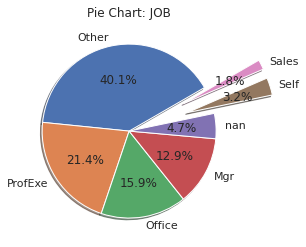

In [163]:
# displaying the pie charts for JOB
x = df['JOB'].value_counts(dropna=False)
theLabels = x.axes[0].tolist()
# print(theLabels)
theSlices = list(x)
explodeList = [ 0 for i in theSlices ]
# print(explodeList)
explodeList[5] = 0.70
explodeList[6] = 0.70
# print(explodeList)
plt.pie( theSlices,
        labels=theLabels,
        startangle = 30,
        explode=explodeList,
        shadow=True,
        autopct="%1.1f%%")
plt.title('Pie Chart: ' + i)
plt.show()   

JOB - most of the applicants (40.1%) have other jobs than the ones specified in the JOB list, followed by Professional Executives and Office jobs.

HISTOGRAMS

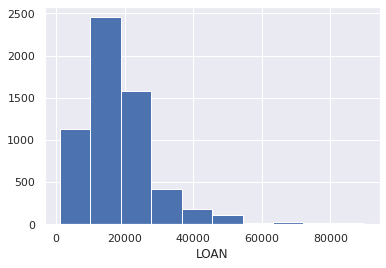

In [164]:
# displaying the histogram for loan
for i in intList:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.show()

The histogram shows that most of the applicants (around 2500) took 10,000 and 20,000 dollars loan value and just a few of them over 60,000 dollars loan value.

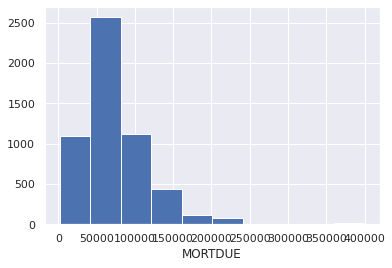

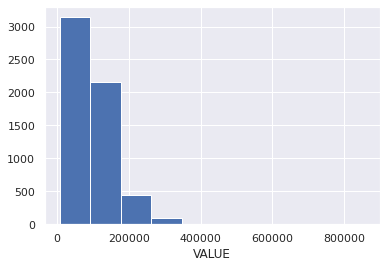

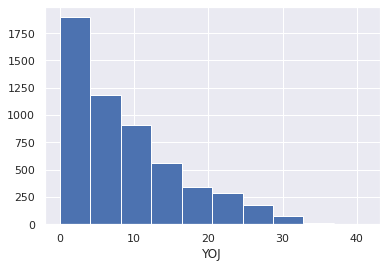

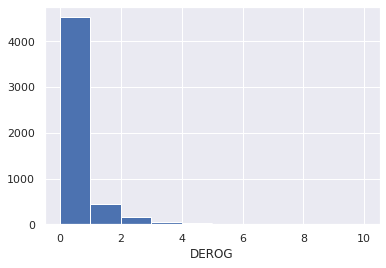

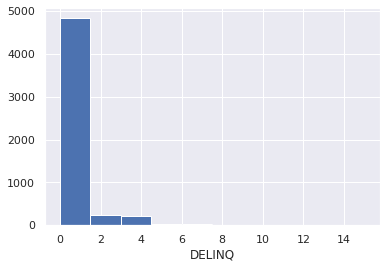

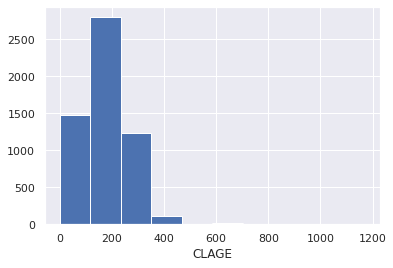

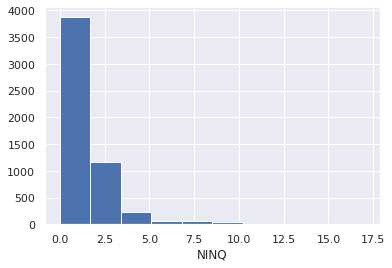

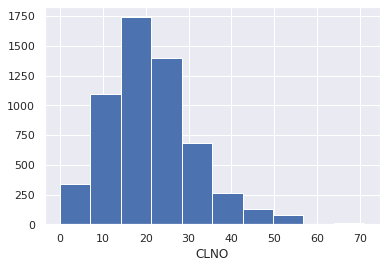

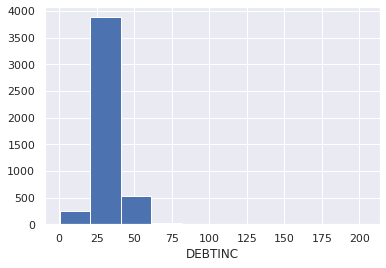

In [165]:
'''
displaying the histograms for current mortgage balance, value house, years on job, derogatory marks,
delinquencies, credit line age, number of inquiries, debt to income ratio
'''
for i in floatList:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.show()

The histograms are right-skewed for most of the variables.
For example, Years on Job histogram shows a few high values away from the interval where the most common values are.
The average of years on job (8.9) is to the right of the mode (7.0).

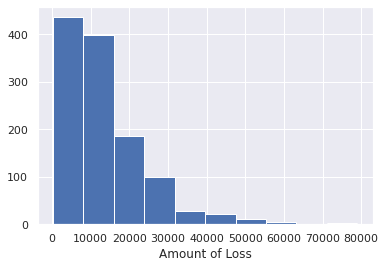

In [166]:
plt.hist(df[TARGET_A])
plt.xlabel('Amount of Loss')
plt.show()

### Imputation of missing values JOB and REASON

In [167]:
# displaying the cardinality of each of the categorical variable, REASON and JOB
for i in objList:
    print(i)
    print(df[i].unique() )

REASON
['HomeImp' nan 'DebtCon']
JOB
['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']


In [168]:
# grouping data by cardinality for categorical variables and counting the records
# displaying the most common category with mode, which returns the most common category NOT missing
# giving a string using [0] 
# displaying the missing values

for i in objList:
    print(i)
    print(df[i].unique())
    g = df.groupby(i)
    print(g[i].count())
    print('-----------')
    print('MOST COMMON = ', df[i].mode()[0] )   
    print('MISSING = ', df[i].isna().sum() )
    print('\n')

REASON
['HomeImp' nan 'DebtCon']
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
-----------
MOST COMMON =  DebtCon
MISSING =  252


JOB
['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: JOB, dtype: int64
-----------
MOST COMMON =  Other
MISSING =  279




REASON has the most common variable Debit Consolidation, 3928, and missing values 252.
Class JOB has the most common variable Other, 2388, and missing values 279.

IMPUTING THE MISSING VALUES USING THE MODE

In [169]:
## fill in the missing values with the mode: create a new variable - the imputed variable

# for i in objList:
#     if df[i].isna().sum() == 0 : continue
#     print(i)    
#     NAME = 'IMP_' + i
#     df[NAME] = df[i]
#     df[NAME] = df[NAME].fillna(df[NAME].mode()[0])  
#     print( "variable", i, "has this many missing", df[i].isna().sum() )
#     print( "variable", NAME, "has this many missing", df[NAME].isna().sum() )
#     print('\n')
#     g = df.groupby(NAME)
#     print(g[NAME].count() )
#     print('\n')
#     #df = df.drop(i, axis = 1)

### Imputing the missing values with the word "MISSING"

In [170]:
'''
create a new variable with the prefix "IMP_", imputed variable 
the new imputed variable will be the exact copy of the variable with the missing values, but the missing values will be replaced with the word "MISSING"
'''
for i in objList:
    if df[i].isna().sum() == 0 : continue
    print(i)    
    NAME = 'IMP_' + i
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna('MISSING')
    print(f"Variable {i} has {df[i].isna().sum()} missing values")
    print(f"Variable {NAME} has {df[NAME].isna().sum()} missing values")
    print('\n')
    g = df.groupby(NAME)
    print(g[NAME].count() )
    print('\n')
    df = df.drop(i, axis = 1)       

REASON
Variable REASON has 252 missing values
Variable IMP_REASON has 0 missing values


IMP_REASON
DebtCon    3928
HomeImp    1780
MISSING     252
Name: IMP_REASON, dtype: int64


JOB
Variable JOB has 279 missing values
Variable IMP_JOB has 0 missing values


IMP_JOB
MISSING     279
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: IMP_JOB, dtype: int64




In [171]:
df.head()

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,IMP_REASON,IMP_JOB
0,1,641.0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,HomeImp,Other
1,1,1109.0,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,HomeImp,Other
2,1,767.0,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,HomeImp,Other
3,1,1425.0,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,MISSING
4,0,NaN,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,HomeImp,Office


* After imputation, the table above shows the two new variables, IMP_REASON and IMP_JOB.
* For entry number 3, for instance, because REASON and JOB were missing, IMP_REASON and IMP_JOB display the word "MISSING".

ONE HOT ENCODING

In [172]:
# update the object list with the imputed variables
dt = df.dtypes
objList = []
for i in dt.index:
    if i in ([TARGET_F, TARGET_A]) : continue
    if dt[i] in (['object']) : objList.append(i) 
print('OBJECTS') 
print('-------')
for i in objList:
    print(i)

OBJECTS
-------
IMP_REASON
IMP_JOB


In [173]:
df.IMP_REASON.unique()    

array(['HomeImp', 'MISSING', 'DebtCon'], dtype=object)

In [174]:
# one hot encoding to transform the categorical variables into numeric variables
'''
 Creating flag variables for JOB and REASON based on category. In one-hot encoding flag variable that matches criteria will hot set to 1 rest of the flag variables will set to 0
- One-Hot encoding for REASON as category variable and JOB as categorical variable will be used in following method below
- Both variables JOB and REASON (categorical) are predictive of both prob of bad loans and amount loan not repaid
- z_ flag for categorical variables
'''

for i in objList :
    print("Class = ", i )
    thePrefix = "z_" + i
    print( thePrefix )
    y = pd.get_dummies(df[i], prefix = thePrefix, dummy_na = False ) 
    print(type(y) )
    print(y.head().T )
    df = pd.concat([df, y], axis = 1 )
    df = df.drop(i, axis = 1 )

Class =  IMP_REASON
z_IMP_REASON
<class 'pandas.core.frame.DataFrame'>
                      0  1  2  3  4
z_IMP_REASON_DebtCon  0  0  0  0  0
z_IMP_REASON_HomeImp  1  1  1  0  1
z_IMP_REASON_MISSING  0  0  0  1  0
Class =  IMP_JOB
z_IMP_JOB
<class 'pandas.core.frame.DataFrame'>
                   0  1  2  3  4
z_IMP_JOB_MISSING  0  0  0  1  0
z_IMP_JOB_Mgr      0  0  0  0  0
z_IMP_JOB_Office   0  0  0  0  1
z_IMP_JOB_Other    1  1  1  0  0
z_IMP_JOB_ProfExe  0  0  0  0  0
z_IMP_JOB_Sales    0  0  0  0  0
z_IMP_JOB_Self     0  0  0  0  0


In [175]:
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.0,0.000000
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.0,NaN
LOAN,1100.000000,1300.000000,1500.000000,1500.0,1700.000000
MORTDUE,25860.000000,70053.000000,13500.000000,NaN,97800.000000
VALUE,39025.000000,68400.000000,16700.000000,NaN,112000.000000
YOJ,10.500000,7.000000,4.000000,NaN,3.000000
DEROG,0.000000,0.000000,0.000000,NaN,0.000000
DELINQ,0.000000,2.000000,0.000000,NaN,0.000000
CLAGE,94.366667,121.833333,149.466667,NaN,93.333333
NINQ,1.000000,0.000000,1.000000,NaN,0.000000


In [176]:
pd.set_option('display.max_columns', 20)
df.T

,0,1,2,3,4,5,6,7,8,9,...,5950,5951,5952,5953,5954,5955,5956,5957,5958,5959
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.0,0.000000,1.000000,1.0,1.000000,1.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.0,NaN,335.000000,1841.0,373.000000,1217.000000,1523.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOAN,1100.000000,1300.000000,1500.000000,1500.0,1700.000000,1700.000000,1800.0,1800.000000,2000.000000,2000.0,...,87500.000000,88300.000000,88500.000000,88800.000000,88900.000000,88900.000000,89000.000000,89200.000000,89800.000000,89900.000000
MORTDUE,25860.000000,70053.000000,13500.000000,NaN,97800.000000,30548.000000,48649.0,28502.000000,32700.000000,NaN,...,55938.000000,54004.000000,50240.000000,53307.000000,48919.000000,57264.000000,54576.000000,54045.000000,50370.000000,48811.000000
VALUE,39025.000000,68400.000000,16700.000000,NaN,112000.000000,40320.000000,57037.0,43034.000000,46740.000000,62250.0,...,86794.000000,94838.000000,94687.000000,94058.000000,93371.000000,90185.000000,92937.000000,92924.000000,91861.000000,88934.000000
YOJ,10.500000,7.000000,4.000000,NaN,3.000000,9.000000,5.0,11.000000,3.000000,16.0,...,15.000000,16.000000,16.000000,16.000000,15.000000,16.000000,16.000000,15.000000,14.000000,15.000000
DEROG,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,3.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DELINQ,0.000000,2.000000,0.000000,NaN,0.000000,0.000000,2.0,0.000000,2.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CLAGE,94.366667,121.833333,149.466667,NaN,93.333333,101.466002,77.1,88.766030,216.933333,115.8,...,223.881040,193.702051,214.426206,218.304978,205.650160,221.808718,208.692070,212.279697,213.892709,219.601002
NINQ,1.000000,0.000000,1.000000,NaN,0.000000,1.000000,1.0,0.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [177]:
df.dtypes

TARGET_BAD_FLAG           int64
TARGET_LOSS_AMT         float64
LOAN                      int64
MORTDUE                 float64
VALUE                   float64
YOJ                     float64
DEROG                   float64
DELINQ                  float64
CLAGE                   float64
NINQ                    float64
CLNO                    float64
DEBTINC                 float64
z_IMP_REASON_DebtCon      uint8
z_IMP_REASON_HomeImp      uint8
z_IMP_REASON_MISSING      uint8
z_IMP_JOB_MISSING         uint8
z_IMP_JOB_Mgr             uint8
z_IMP_JOB_Office          uint8
z_IMP_JOB_Other           uint8
z_IMP_JOB_ProfExe         uint8
z_IMP_JOB_Sales           uint8
z_IMP_JOB_Self            uint8
dtype: object

In [178]:
df.isna().sum()

TARGET_BAD_FLAG            0
TARGET_LOSS_AMT         4771
LOAN                       0
MORTDUE                  518
VALUE                    112
YOJ                      515
DEROG                    708
DELINQ                   580
CLAGE                    308
NINQ                     510
CLNO                     222
DEBTINC                 1267
z_IMP_REASON_DebtCon       0
z_IMP_REASON_HomeImp       0
z_IMP_REASON_MISSING       0
z_IMP_JOB_MISSING          0
z_IMP_JOB_Mgr              0
z_IMP_JOB_Office           0
z_IMP_JOB_Other            0
z_IMP_JOB_ProfExe          0
z_IMP_JOB_Sales            0
z_IMP_JOB_Self             0
dtype: int64

In [179]:
# store the integers and floats into a list called numList

numList = []

for i in dt.index:
    #print('here is i', i, '...and here is dt[i]', dt[i])
    if i in ([TARGET_F, TARGET_A]) : continue
    if dt[i] in (['int64', 'float64']) : numList.append(i)
print('NUMBERS')
print('------')
for i in numList:
    print(i)

NUMBERS
------
LOAN
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC


In [180]:
# create a FLAG showing the missing value, name it M_
# create an imputed value with the median, name it IMP_

for i in numList :
    if df[i].isna().sum() == 0 : continue
    #FLAG = 'M_' + i
    IMP = 'IMP_' + i
    print(i)
    print(df[i].isna().sum() )
    #print(FLAG)
    print(IMP)
    print('----------')
    #df[FLAG] = df[i].isna() + 0
    df[IMP] = df[i]
    df.loc[df[IMP].isna(), IMP] = df[i].median()
    df = df.drop(i, axis = 1 )

MORTDUE
518
IMP_MORTDUE
----------
VALUE
112
IMP_VALUE
----------
YOJ
515
IMP_YOJ
----------
DEROG
708
IMP_DEROG
----------
DELINQ
580
IMP_DELINQ
----------
CLAGE
308
IMP_CLAGE
----------
NINQ
510
IMP_NINQ
----------
CLNO
222
IMP_CLNO
----------
DEBTINC
1267
IMP_DEBTINC
----------


In [181]:
# numList check

dt = df.dtypes
numList = []
for i in dt.index :
    #print(i, dt[i])
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if 'M_' in i : continue    
    if dt[i] in (['float64','int64']) : numList.append( i )
        
for i in numList:
   print(i)

LOAN
IMP_MORTDUE
IMP_VALUE
IMP_YOJ
IMP_DEROG
IMP_DELINQ
IMP_CLAGE
IMP_NINQ
IMP_CLNO
IMP_DEBTINC


In [182]:
# recheck for missing values

df.isna().sum()

TARGET_BAD_FLAG            0
TARGET_LOSS_AMT         4771
LOAN                       0
z_IMP_REASON_DebtCon       0
z_IMP_REASON_HomeImp       0
z_IMP_REASON_MISSING       0
z_IMP_JOB_MISSING          0
z_IMP_JOB_Mgr              0
z_IMP_JOB_Office           0
z_IMP_JOB_Other            0
z_IMP_JOB_ProfExe          0
z_IMP_JOB_Sales            0
z_IMP_JOB_Self             0
IMP_MORTDUE                0
IMP_VALUE                  0
IMP_YOJ                    0
IMP_DEROG                  0
IMP_DELINQ                 0
IMP_CLAGE                  0
IMP_NINQ                   0
IMP_CLNO                   0
IMP_DEBTINC                0
dtype: int64

In [183]:
# recheck all the categorical variables are numeric variables

df.dtypes

TARGET_BAD_FLAG           int64
TARGET_LOSS_AMT         float64
LOAN                      int64
z_IMP_REASON_DebtCon      uint8
z_IMP_REASON_HomeImp      uint8
z_IMP_REASON_MISSING      uint8
z_IMP_JOB_MISSING         uint8
z_IMP_JOB_Mgr             uint8
z_IMP_JOB_Office          uint8
z_IMP_JOB_Other           uint8
z_IMP_JOB_ProfExe         uint8
z_IMP_JOB_Sales           uint8
z_IMP_JOB_Self            uint8
IMP_MORTDUE             float64
IMP_VALUE               float64
IMP_YOJ                 float64
IMP_DEROG               float64
IMP_DELINQ              float64
IMP_CLAGE               float64
IMP_NINQ                float64
IMP_CLNO                float64
IMP_DEBTINC             float64
dtype: object

## Split data

In [184]:
# create a copy of the data set

x = df.copy()
x.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.000000,0.000000
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.000000,NaN
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
z_IMP_REASON_DebtCon,0.000000,0.000000,0.000000,0.000000,0.000000
z_IMP_REASON_HomeImp,1.000000,1.000000,1.000000,0.000000,1.000000
z_IMP_REASON_MISSING,0.000000,0.000000,0.000000,1.000000,0.000000
z_IMP_JOB_MISSING,0.000000,0.000000,0.000000,1.000000,0.000000
z_IMP_JOB_Mgr,0.000000,0.000000,0.000000,0.000000,0.000000
z_IMP_JOB_Office,0.000000,0.000000,0.000000,0.000000,1.000000
z_IMP_JOB_Other,1.000000,1.000000,1.000000,0.000000,0.000000


In [185]:
'''
Prepare the data to be used to build the decision tree
Drop target flag and target amount 
'''
x = x.drop( TARGET_F, axis = 1 )
x = x.drop( TARGET_A, axis = 1 )
x.head().T

,0,1,2,3,4
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
z_IMP_REASON_DebtCon,0.000000,0.000000,0.000000,0.000000,0.000000
z_IMP_REASON_HomeImp,1.000000,1.000000,1.000000,0.000000,1.000000
z_IMP_REASON_MISSING,0.000000,0.000000,0.000000,1.000000,0.000000
z_IMP_JOB_MISSING,0.000000,0.000000,0.000000,1.000000,0.000000
z_IMP_JOB_Mgr,0.000000,0.000000,0.000000,0.000000,0.000000
z_IMP_JOB_Office,0.000000,0.000000,0.000000,0.000000,1.000000
z_IMP_JOB_Other,1.000000,1.000000,1.000000,0.000000,0.000000
z_IMP_JOB_ProfExe,0.000000,0.000000,0.000000,0.000000,0.000000
z_IMP_JOB_Sales,0.000000,0.000000,0.000000,0.000000,0.000000


In [186]:
# store the targets into a data frame

y = df[ [TARGET_F, TARGET_A] ] 
y.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.0,1.0,1.0,1.0,0.0
TARGET_LOSS_AMT,641.0,1109.0,767.0,1425.0,NaN


In [187]:
'''
Splitting dataset is essential for an unbiased evaluation of prediction performance
80% of data is training data on which the model will be trained
20% of data is test data, fresh data that the model did not see before and needed for unbiased evaluation of the model
Set a random state to have the same data when the model is run over and over again.
'''
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 1) 

In [188]:
# x is predicting y

print('FLAG DATA:', '\n')
print('Shape of original INPUT data set:', x.shape)
print('Shape of original OUTPUT data set:', y.shape, '\n')
print('Shape of input TRAINING data set = ', x_train.shape)
print('Shape of output TRAINING data set = ', y_train.shape, '\n')
print('Shape of input TEST data set = ', x_test.shape)
print('Shape of output TEST data set = ', y_test.shape)

FLAG DATA: 

Shape of original INPUT data set: (5960, 20)
Shape of original OUTPUT data set: (5960, 2) 

Shape of input TRAINING data set =  (4768, 20)
Shape of output TRAINING data set =  (4768, 2) 

Shape of input TEST data set =  (1192, 20)
Shape of output TEST data set =  (1192, 2)


In [189]:
# display the first five records in the train predictive data set

x_train.head().T

,5292,1162,2355,3620,1247
LOAN,29000.000000,10000.000000,14200.000000,19000.000000,10200.000000
z_IMP_REASON_DebtCon,1.000000,0.000000,1.000000,1.000000,0.000000
z_IMP_REASON_HomeImp,0.000000,1.000000,0.000000,0.000000,1.000000
z_IMP_REASON_MISSING,0.000000,0.000000,0.000000,0.000000,0.000000
z_IMP_JOB_MISSING,0.000000,0.000000,0.000000,0.000000,0.000000
z_IMP_JOB_Mgr,0.000000,0.000000,1.000000,0.000000,0.000000
z_IMP_JOB_Office,0.000000,0.000000,0.000000,1.000000,0.000000
z_IMP_JOB_Other,1.000000,1.000000,0.000000,0.000000,0.000000
z_IMP_JOB_ProfExe,0.000000,0.000000,0.000000,0.000000,1.000000
z_IMP_JOB_Sales,0.000000,0.000000,0.000000,0.000000,0.000000


In [190]:
# display the first five records in the predictive test data set

x_test.head().T

,4146,4103,5439,997,5908
LOAN,21600.000000,21400.000000,32200.000000,9400.000000,65100.000000
z_IMP_REASON_DebtCon,1.000000,0.000000,1.000000,0.000000,0.000000
z_IMP_REASON_HomeImp,0.000000,1.000000,0.000000,1.000000,1.000000
z_IMP_REASON_MISSING,0.000000,0.000000,0.000000,0.000000,0.000000
z_IMP_JOB_MISSING,0.000000,0.000000,0.000000,0.000000,0.000000
z_IMP_JOB_Mgr,0.000000,1.000000,0.000000,0.000000,0.000000
z_IMP_JOB_Office,0.000000,0.000000,0.000000,0.000000,1.000000
z_IMP_JOB_Other,0.000000,0.000000,1.000000,1.000000,0.000000
z_IMP_JOB_ProfExe,0.000000,0.000000,0.000000,0.000000,0.000000
z_IMP_JOB_Sales,0.000000,0.000000,0.000000,0.000000,0.000000


In [191]:
# display the first five records (similar to the above ones) in the train predictions data set

y_train.head().T

,5292,1162,2355,3620,1247
TARGET_BAD_FLAG,1.0,0.0,0.0,0.0,0.0
TARGET_LOSS_AMT,31053.0,NaN,NaN,NaN,NaN


In [192]:
# display the first five records of the predictions test data set

y_test.head().T

,4146,4103,5439,997,5908
TARGET_BAD_FLAG,1.0,0.0,0.0,0.0,0.0
TARGET_LOSS_AMT,23515.0,NaN,NaN,NaN,NaN


##  DECISION TREE CLASSIFICATION TASK

In [193]:
# create decision tree classifier fm01_Tree setting 4-level deep with respect of TARGET_F 
# fit the decision tree using the training data and use the flag whether or not the loan defaulted, TARGET_F

fm01_Tree = tree.DecisionTreeClassifier (max_depth = 4) 
fm01_Tree = fm01_Tree.fit (x_train, y_train [ TARGET_F]) 

In [194]:
# predict default loan chances for the training and test data

y_Pred_train = fm01_Tree.predict(x_train)
y_Pred_test = fm01_Tree.predict(x_test)

In [195]:
# calculate the accuracy based on the metrics between the real scores and the predicted ones for both taining and test data sets

print('The accuracy of the model based on the training data set is ', metrics.accuracy_score(y_train [TARGET_F], y_Pred_train))
print('The accuracy of the model based on the test data set is ', metrics.accuracy_score(y_test [TARGET_F], y_Pred_test))

The accuracy of the model based on the training data set is  0.8729026845637584
The accuracy of the model based on the test data set is  0.8506711409395973


88% accuracy, meaning that 88% of the time, the model correctly predicted the target variables. 
85% accurate, meaning that 85% of the time, the model correctly predicted the target variables.  
The two values have relatively close values meaning that the the model performed well.

In [196]:
# prediction for the first 10 people of default loan; 
# out of the first ten recods, five are predicted to not pay the loan

y_Pred_train [0:10]

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

 ## RECEIVER OPERATING CHARACTERISTICS (ROC) CURVE

In [197]:
# predict probability for training data set

probs = fm01_Tree.predict_proba(x_train)

In [198]:
# display the first ten probabilities for training data set

probs[0:10]

array([[0.17333333, 0.82666667],
       [0.17333333, 0.82666667],
       [0.942     , 0.058     ],
       [0.50470219, 0.49529781],
       [0.942     , 0.058     ],
       [0.942     , 0.058     ],
       [0.        , 1.        ],
       [0.17333333, 0.82666667],
       [0.9649562 , 0.0350438 ],
       [0.942     , 0.058     ]])

On the training data set:
    The first person has a probability of 17% chance of paying the loan and 83% chance of not paying the loan
    The last person has a probability of 94% chance of paying the loan and 6%  chance of not paying the loan                  

In [199]:
# probability default loan for all rows in column 1 for training data set

p1 = probs[:, 1] 

# display the default loan probability for the first 10 records for training data set

p1[0:10]

array([0.82666667, 0.82666667, 0.058     , 0.49529781, 0.058     ,
       0.058     , 1.        , 0.82666667, 0.0350438 , 0.058     ])

In [200]:
# predict probability for test data set

probs = fm01_Tree.predict_proba(x_test)
probs[0:10]

array([[0.83108108, 0.16891892],
       [0.942     , 0.058     ],
       [0.942     , 0.058     ],
       [0.9649562 , 0.0350438 ],
       [0.83108108, 0.16891892],
       [0.942     , 0.058     ],
       [0.942     , 0.058     ],
       [0.9649562 , 0.0350438 ],
       [0.50470219, 0.49529781],
       [0.9649562 , 0.0350438 ]])

In [201]:
'''
TRAINING DATA
y_train [TARGET_F] shows the real values, p1 shows the probability
False positive rate (1 - SPECIFICITY) shows the proportion of paid loans incorrectly classified as unpaid
True positive rate (SENSITIVITY) shows the proportion of loans correctly classified
'''
fpr_train, tpr_train, treshhold = metrics.roc_curve (y_train [TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

In [202]:
# probability loan defaulted for test data set

p1 = probs[:,1]

# display the loan defaulted probability for the first 10 records for test data set

p1[0:10]

array([0.16891892, 0.058     , 0.058     , 0.0350438 , 0.16891892,
       0.058     , 0.058     , 0.0350438 , 0.49529781, 0.0350438 ])

In the test data set:
    First person has 73% chance of loan defaulted.
    Last person has 5% chance of loan defaulted.'''
TEST DATA
y_test [TARGET_F] shows the real values, p1 shows the probability
'''

fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [203]:
'''
TEST DATA
y_test [TARGET_F] shows the real values, p1 shows the probability
'''

fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [204]:
# False Positive Rate for first 10 records for training data set 

fpr_train[0:10] 

array([0.00000000e+00, 0.00000000e+00, 2.61301280e-04, 1.72458845e-02,
       1.75071858e-02, 1.01646198e-01, 1.03475307e-01, 1.67755422e-01,
       2.27070813e-01, 5.96289522e-01])

In [205]:
# True Positive Rate for first 10 records for training data set 

tpr_train[0:10]

array([0.        , 0.06695005, 0.09458023, 0.424017  , 0.4272051 ,
       0.76301807, 0.76514346, 0.81827843, 0.84803401, 0.94048884])

In [206]:
# False Positive Rate for first 10 records for test data set 

fpr_test[0:10]

array([0.        , 0.00105932, 0.00105932, 0.01483051, 0.01588983,
       0.09427966, 0.09533898, 0.16101695, 0.20868644, 0.57733051])

In [207]:
# True Positive Rate for first 10 records for test data set 

tpr_test[0:10]

array([0.        , 0.03225806, 0.06048387, 0.34274194, 0.34274194,
       0.69354839, 0.69758065, 0.75403226, 0.80241935, 0.91935484])

In [208]:
fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test

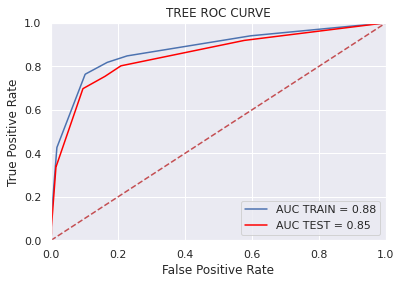

In [209]:
# print ROC curve using matplotlib for training and test data 

plt.title('TREE ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The larger the area under the curve (or the higher the ROC curve), the better is the performance.
The diagonal line represents the values for the true positive rate equal to the false positive rate values. 
The blue line represents the ROC curve for the training data set and its AUC (area under the curve) is 88%.
The red line represents the ROC curve for the test training set and its AUC is 85%. 
The test data is not as accurate as the training data, but they are close in values.

VISUALIZATION OF FLAG TREE

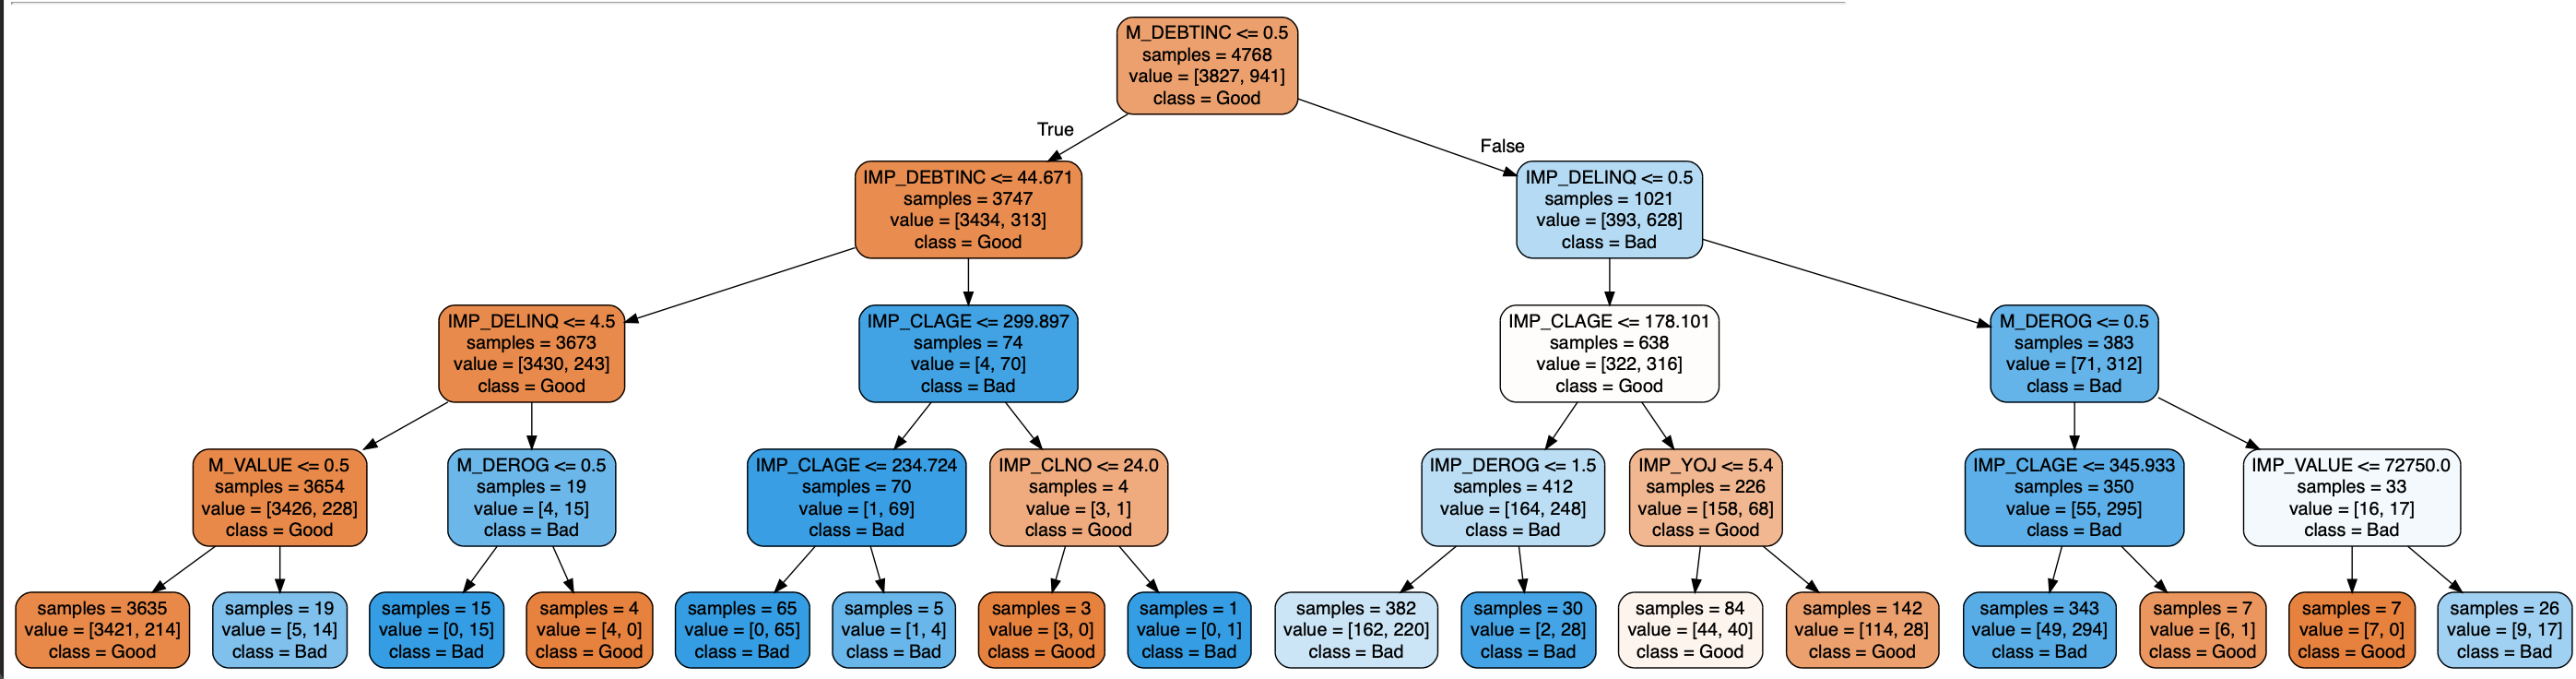

In [210]:
feature_cols = list(x.columns.values) 
tree.export_graphviz(fm01_Tree, out_file = 'HMEQ_f.txt',filled = True, rounded = True, feature_names = feature_cols, impurity = False, class_names=['Good', 'Bad'])

TRUE

The root node, the best indicator for whether of not the loan is repaid is Debit to Income Ratio variable, which is populated with the all values provided in the data set, 4768. Out all of these, about 80% of the loans are paid and about 20% are not paid. In othe rwords, one in four loans based on this variable will go bad.
If the condition Debit to Ratio <= 0.5 is statisfied, the next node takes into account 3747 records and uses Debt to Income Ratio as a classifier.

Debt to Income Ratio: Out of 3747 record, 91% chances the loan is paid and 9% chances the loan is not paid. In other words, only one in ten loans based on this variable will go bad.
If the condition Debt to Income Ratio <= 44671 is statisfied, the next node takes into account Delinquencies.

Delinquencies: Out of 3673 records, 93% chances the loan is paid and 7% chances the loan is not paid.
If the condition Delinquencies <= 4.5 is satisfied, the next node takes into account the Value of the house.

FALSE
If the condition Debit to Income Ratio <= is not satisfied, the next node takes into account 1021 records and uses Delinquencies as a classifier.

Delinquencies: the chances a loan goes bad increase. A loan out of two may go bad. 
If the condition Delinquencies <= 0.5 is not satisfied, the next node takes into account Derogatory Marks on Credit Record. 

Derogatory Marks on Credit Record: 300% increase for a loan to go bad.

DESISION TREES IN VARIABLES SELECTION
Decision Tree has the advantage of narrowing down thousands of variables and select only the important ones for accurate prediction.

In [211]:
def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else 'undefined!' for i in tree_.feature ]
    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list

In [212]:
vars_tree_flag = getTreeVars( fm01_Tree, feature_cols )

In [213]:
for i in vars_tree_flag:
    print(i)

z_IMP_JOB_Other
IMP_VALUE
IMP_DELINQ
IMP_CLAGE
IMP_NINQ
IMP_DEBTINC


These are the only variables that will be used and are predictive of loan default.

   DECISION TREE REGRESSION TASK
   Regression model is used to predict a continuous target variable.

In [214]:
# check for missing values

y_train.head().T

,5292,1162,2355,3620,1247
TARGET_BAD_FLAG,1.0,0.0,0.0,0.0,0.0
TARGET_LOSS_AMT,31053.0,NaN,NaN,NaN,NaN


In [215]:
# drop the missings 

F = ~ y_train[ TARGET_A ].isna()

In [216]:
# check if missing

F.isna().sum()

0

In [217]:
# make copies of df
# x_train[F] is my input data and i will subset it by the flag F 
# W_train - only the records (variables) without missing 
# W_train - only the records (target) without missings 

F = ~ y_train[ TARGET_A ].isna()
W_train = x_train[F].copy() 
Z_train = y_train[F].copy()

In [218]:
# drop the missings of the test data set 

F = ~ y_test[ TARGET_A ].isna()
W_test = x_test[F].copy()
Z_test = y_test[F].copy()

In [219]:
# verify there is no missing

print(W_train.isna().sum(), '\n')
print(Z_train.isna().sum(), '\n')
print(W_test.isna().sum(), '\n')
print(Z_train.isna().sum(), '\n')

LOAN                    0
z_IMP_REASON_DebtCon    0
z_IMP_REASON_HomeImp    0
z_IMP_REASON_MISSING    0
z_IMP_JOB_MISSING       0
z_IMP_JOB_Mgr           0
z_IMP_JOB_Office        0
z_IMP_JOB_Other         0
z_IMP_JOB_ProfExe       0
z_IMP_JOB_Sales         0
z_IMP_JOB_Self          0
IMP_MORTDUE             0
IMP_VALUE               0
IMP_YOJ                 0
IMP_DEROG               0
IMP_DELINQ              0
IMP_CLAGE               0
IMP_NINQ                0
IMP_CLNO                0
IMP_DEBTINC             0
dtype: int64 

TARGET_BAD_FLAG    0
TARGET_LOSS_AMT    0
dtype: int64 

LOAN                    0
z_IMP_REASON_DebtCon    0
z_IMP_REASON_HomeImp    0
z_IMP_REASON_MISSING    0
z_IMP_JOB_MISSING       0
z_IMP_JOB_Mgr           0
z_IMP_JOB_Office        0
z_IMP_JOB_Other         0
z_IMP_JOB_ProfExe       0
z_IMP_JOB_Sales         0
z_IMP_JOB_Self          0
IMP_MORTDUE             0
IMP_VALUE               0
IMP_YOJ                 0
IMP_DEROG               0
IMP_DELINQ        

In [220]:
# create decision tree regressor with respect to loss amount, TARGET_A

amt_m01_Tree = tree.DecisionTreeRegressor( max_depth = 4)
amt_m01_Tree = amt_m01_Tree.fit( W_train, Z_train[TARGET_A] ) 

In [221]:
# test the accuracy
# predict the loss assuming that the person will not pay the loan

Z_Pred_train = amt_m01_Tree.predict(W_train)
Z_Pred_test = amt_m01_Tree.predict(W_test)

In [222]:
 RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print('TREE RMSE Train:', RMSE_TRAIN )
print('TREE RMSE Test:', RMSE_TEST )

TREE RMSE Train: 4603.091178678556
TREE RMSE Test: 5770.601714157058


In [223]:
RMSE_TREE = RMSE_TEST

  VISUALIZATION OF THE AMOUNT LOSS TREE

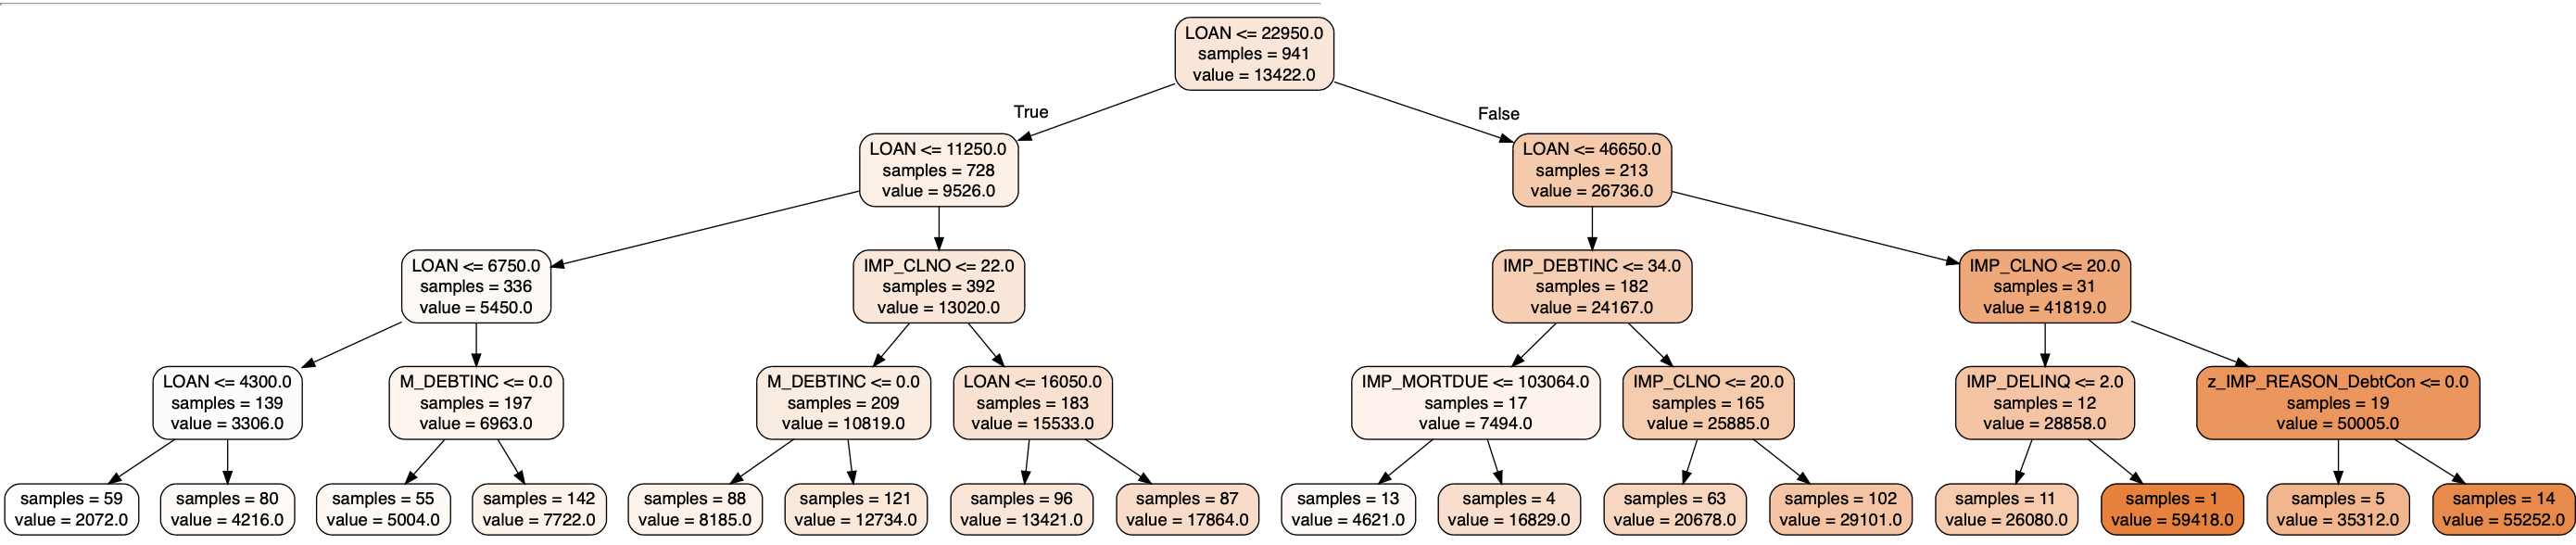

In [224]:
feature_cols = list( x.columns.values )
vars_tree_amt = getTreeVars( amt_m01_Tree, feature_cols ) 
tree.export_graphviz(amt_m01_Tree,out_file='HMEQ_a.txt', filled = True, rounded = True, feature_names = feature_cols, impurity = False, precision = 0 )

TRUE

The root node, the best predictor for the loss amount is LOAN variable, which is populated with the all values provided in the data set, 941. 

If the condition LOAN <= 22950 is statisfied, the next node takes into account LOAN <= 11250 where there are 728 records and the loss values is decreasing with 70%. In other words, if the person does not take a high value loan, the chaces to repay the loan are greater than if the person takes a high value loan (benchmark, 22950 dollars) 

If the condition LOAN <= 11250 is satisfied, the next node takes into account LOAN <= 4300 where there are 139 records and the loss amount is even more decresing.


FALSE
If the condition LOAN <= 22950 is not satisfied, the next node takes into account LOAN <= 46650 and 213 records. The loss amount value is increasing.

From the LOAN <= 46650, if FALSE, Number of Credit Lines is accounted for and a greater loss amount is registered, 41819.

In [225]:
for i in vars_tree_amt:
    print(i)

LOAN
z_IMP_REASON_DebtCon
IMP_MORTDUE
IMP_CLNO
IMP_DEBTINC


These are the only variables that will be used and are predictive of the loss amount.

In [226]:
# Fix the ouliers in target variables.
print( 'MEAN Train', Z_train[TARGET_A].mean(), '\n')
print( 'MEAN Test', Z_test[TARGET_A].mean() )

MEAN Train 13421.64505844846 

MEAN Test 13387.758064516129


In [227]:
print( Z_train.describe(), '\n')
print( Z_test.describe() )

       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count            941.0       941.000000
mean               1.0     13421.645058
std                0.0     10662.481428
min                1.0       224.000000
25%                1.0      5817.000000
50%                1.0     10959.000000
75%                1.0     17635.000000
max                1.0     73946.000000 

       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count            248.0       248.000000
mean               1.0     13387.758065
std                0.0     11508.703991
min                1.0       320.000000
25%                1.0      5214.500000
50%                1.0     11336.500000
75%                1.0     16734.000000
max                1.0     78987.000000


In [228]:
# set a cap at 55000 as the min is 320 and max is 78987 dollars.

F = Z_train[TARGET_A] > 55000 
Z_train.loc[F, TARGET_A] = 55000 

In [229]:
F = Z_test[ TARGET_A ] > 55000
Z_test.loc[ F, [TARGET_A] ] = 55000

In [230]:
# describe again

print( 'MEAN Train', Z_train[TARGET_A].mean(), '\n')
print( 'MEAN Test', Z_test[TARGET_A].mean() )

MEAN Train 13375.273113708821 

MEAN Test 13217.588709677419


RANDOM FOREST CLASSIFICATION TASK

In [231]:
# create tree search function for Random Forest

def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key = itemgetter(1),reverse = True)
    return theList

In [232]:
# random forest classifier with respect to loan default, TARGET_F

fm01_RF = RandomForestClassifier( n_estimators = 100, random_state = 1 )
fm01_RF = fm01_RF.fit(x_train, y_train[ TARGET_F ] )

In [233]:
# score the predictions

y_Pred_train = fm01_RF.predict(x_train)
y_Pred_test = fm01_RF.predict(x_test)

In [234]:
# calculate the accuracy

print('RANDOM FOREST:', '\n')
print('Probability of default loan', '\n')
print('The accuracy of the model based on the training data set is ',metrics.accuracy_score(y_train[TARGET_F], y_Pred_train))
print('The accuracy of the model based on the test data set is',metrics.accuracy_score(y_test[TARGET_F], y_Pred_test))

RANDOM FOREST: 

Probability of default loan 

The accuracy of the model based on the training data set is  0.9997902684563759
The accuracy of the model based on the test data set is 0.9211409395973155


In [235]:
# create a ROC curve

probs = fm01_RF.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_RF.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test

In [236]:
feature_cols = list( x.columns.values )
vars_RF_flag = getEnsembleTreeVars( fm01_RF, feature_cols )

In [237]:
for i in vars_RF_flag :
   print( i )

('IMP_DEBTINC', 100)
('IMP_CLAGE', 44)
('IMP_DELINQ', 41)
('LOAN', 40)
('IMP_VALUE', 39)
('IMP_MORTDUE', 37)
('IMP_CLNO', 35)
('IMP_YOJ', 27)
('IMP_DEROG', 25)


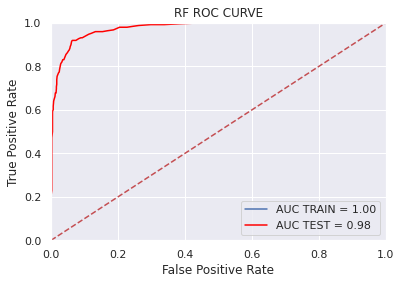

In [238]:
# create the ROC curve

plt.title('RF ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The larger the area under the curve (or the higher the ROC curve), the better is the performance.
The diagonal line represents the values for with the true positive rate is equal to the false positive rate. 
The blue line represents the ROC curve for the training data set and its AUC (area under the curve) is 100%.
The red line represents the ROC curve for the test training set and its AUC is 97%. 
The test data is not as accurate as the training data, but they are close in values.

   RANDOM FOREST REGRESSION TASK

In [239]:
# random forest regressor with respect to loss amount, TARGET_A

amt_m01_RF = RandomForestRegressor(n_estimators = 100, random_state = 1)
amt_m01_RF = amt_m01_RF.fit( W_train, Z_train[TARGET_A] )

Z_Pred_train = amt_m01_RF.predict(W_train)
Z_Pred_test = amt_m01_RF.predict(W_test)

In [240]:
RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

In [241]:
RMSE_RF = RMSE_TEST

feature_cols = list( x.columns.values )
vars_RF_amt = getEnsembleTreeVars( amt_m01_RF, feature_cols )

In [242]:
for i in vars_RF_amt :
   print( i )

('LOAN', 100)
('IMP_CLNO', 13)
('IMP_DEBTINC', 9)


GRADIENT BOOSTING CLASSIFICATION TASK

In [243]:
# create gradient boosting classifier with respect to default loan, TARGET_F

fm01_GB = GradientBoostingClassifier( random_state = 1 )
fm01_GB = fm01_GB.fit( x_train, y_train[ TARGET_F ] )

In [244]:
# predict the training and test data sets

y_Pred_train = fm01_GB.predict(x_train)
y_Pred_test = fm01_GB.predict(x_test)

In [245]:
# test the accuracy

print('GRADIENT BOOSTING:', '\n')
print('Probability of default loan')
print('Accuracy Train:', metrics.accuracy_score(y_train[TARGET_F], y_Pred_train))
print('Accuracy Test:', metrics.accuracy_score(y_test[TARGET_F], y_Pred_test))

GRADIENT BOOSTING: 

Probability of default loan
Accuracy Train: 0.9194630872483222
Accuracy Test: 0.9026845637583892


In [246]:
# create the ROC curve

probs = fm01_GB.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_GB.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_GB = fpr_test
tpr_GB = tpr_test
auc_GB = roc_auc_test

In [247]:
# what variables are predictive of default loan 

feature_cols = list( x.columns.values )
vars_GB_flag = getEnsembleTreeVars( fm01_GB, feature_cols )

for i in vars_GB_flag:
    print(i)

('IMP_DEBTINC', 100)
('IMP_DELINQ', 30)
('IMP_CLAGE', 13)
('IMP_DEROG', 11)


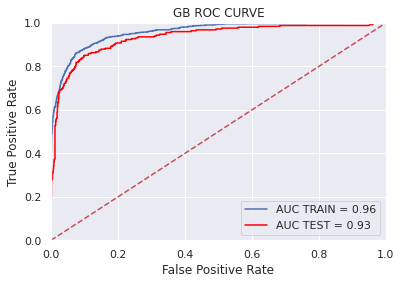

In [248]:
# create ROC curve 

plt.title('GB ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

  GRADIENT BOOSTING REGRESSION TASK

In [249]:
# create the GB regressor with respect of loss amount, TARGET_A
# accuracy of the model in predicting how much the loss amount will be

amt_m01_GB = GradientBoostingRegressor(random_state = 1)
amt_m01_GB = amt_m01_GB.fit( W_train, Z_train[TARGET_A] )

In [250]:
# score the predictions

Z_Pred_train = amt_m01_GB.predict(W_train)
Z_Pred_test = amt_m01_GB.predict(W_test)

In [251]:
RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print('GB RMSE Train:', RMSE_TRAIN )
print('GB RMSE Test:', RMSE_TEST )

RMSE_GB = RMSE_TEST

GB RMSE Train: 1284.636643155702
GB RMSE Test: 2421.1713494993637


In [252]:
# what variables are predictive 

feature_cols = list( x.columns.values )
vars_GB_amt = getEnsembleTreeVars( amt_m01_GB, feature_cols )

for i in vars_GB_amt:
    print(i)

('LOAN', 100)
('IMP_CLNO', 14)
('IMP_DEBTINC', 11)


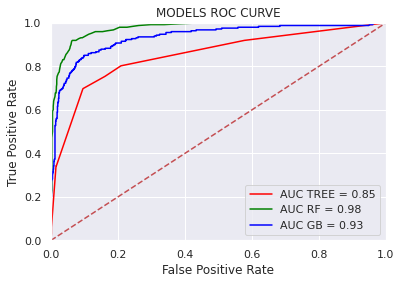

In [253]:
plt.title('MODELS ROC CURVE')
plt.plot(fpr_tree, tpr_tree, 'b', label = 'AUC TREE = %0.2f' % auc_tree, color = 'red')
plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC RF = %0.2f' % auc_RF, color = 'green')
plt.plot(fpr_GB, tpr_GB, 'b', label = 'AUC GB = %0.2f' % auc_GB, color = 'blue')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Comparing the three models, Random Forest AUC is the largest, 97%, which means the Random Forest is the most accurate of the three models.

In [254]:
print('Root Mean Square Average for LOSS AMOUNT', '\n')
print('TREE', RMSE_TREE)
print('RF', RMSE_RF)
print('GB', RMSE_GB)

Root Mean Square Average for LOSS AMOUNT 

TREE 5770.601714157058
RF 3141.916482162355
GB 2421.1713494993637


Root Mean Squared Error measures the error rate of a regression model.The lower the RMSE, the better the given model is able to fit a data set. Gradient Boosting RMSE is the lowest, meaning that the average distance between the predicted values from this models and the actual values in the da